In [29]:
#here we load in different things to map. We start by inputting the code written.



# This file data structure that tracks the spiders movement
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Class for points
class Point:
    def __init__(self, x, y, z):
        #Points are defined in terms of immutable x,y,z tuple
        self.position = (x, y,z)


    def __str__(self):
        return self.position

    def getX(self):
        return self.position[0]

    def getY(self):
        return self.position[1]
    
    def getZ(self):
        return self.position[2]


# DataStructure that Stores Information About Points and time they were entered
class SpaceAndTime:

    def __init__(self, func):
        # Represent full location set as a list of positions
        # Start time = 0 at index 0, each next point is a second
        self.spiderMovement = []
        function = func

    def nextSecond(self, x, y, z):
        #Adds a point given it's x,yz and coordinates
        self.spiderMovement.append(Point(x, y, z))

    def get(self, second):
        if second > len(self.spiderMovement):
            return "Out of bounds"
        else:
            return self.spiderMovement[second]

    def __str__(self):
        #Returning this as a string returns it as a list!

        return self.spiderMovement

    def entries(self):
        return len(self.spiderMovement)


    def getLists(self):
        x = [self.get(i).getX() for i in range(self.entries())]
        y = [self.get(i).getY() for i in range(self.entries())]
        z = [self.get(i).getZ() for i in range(self.entries())]

        t = [i for i in range(self.entries())]
        return x, y, z, t
    

    #TODO: Jason -- graphing

    def plot_points_3d(self):
        x, y, z, t = self.getLists()
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x, y, z, c='b', marker='o')
        
    plt.show()



    def lists_to_excel(self, file_name):
        #MadeByChatGPT

        t, x, y = self.getLists()

        # create a dataframe from the three lists
        df = pd.DataFrame({'Time': t, 'X': x, 'Y': y})

        # create a writer object for Excel
        writer = pd.ExcelWriter(file_name, engine='xlsxwriter')

        # write the dataframe to Excel
        df.to_excel(writer, index=False, sheet_name='Sheet1')

        # save the Excel file
        writer.save()

        import random
import math


# Generates a random slope between the indicated range
def randomNum (start, final):
    # Input: Int
    # Output: Int
    return random.randint(start, final)



def intersection(x, y, z, currentSpace, lfunc):
    for t in range(-10, 10):
        startX = x*t
        startY = y*t
        currentSpace.nextSecond(startX, startY, lfunc(startX,startY))



def pointGenerator(lfunc, slope_iterations, x_iterations, starting_S, final_S):
#lfunc: lambda function that takes in x, y, z and generates point based off of them
#iterations: number of lines and x values  we want to find the intersect ot

    spacetime = SpaceAndTime(lfunc)

    for slope_number in range(slope_iterations):
        #iterate over the number of lines that we want to create
        startingX = randomNum(starting_S, final_S)
        startingY = randomNum(starting_S, final_S)
        startingZ = randomNum(starting_S, final_S)
        intersection(startingX, startingY, startingZ, spacetime, lfunc)


    spacetime.plot_points_3d()




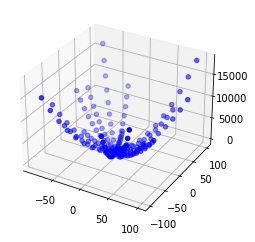

In [30]:
#Test the norm function
norm = lambda x, y:(x ** 2 + y ** 2)


pointGenerator(norm, 10, 100, -10, 10)






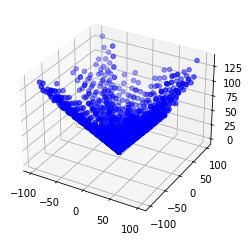

In [31]:
#Cone
cone = lambda x, y: math.sqrt(x ** 2 + y ** 2)


pointGenerator(cone, 100, 1000, -10 , 10)

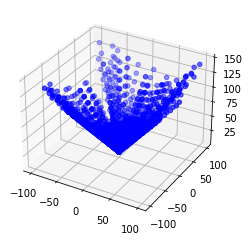

In [32]:
#shifted norm
shiftednorm = lambda x, y: math.sqrt(x ** 2 + y ** 2) + 10


pointGenerator(shiftednorm, 100, 1000, -10 , 10)

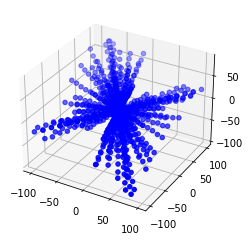

In [60]:
#hyperbolicparabaloid
hyperbolicparabaloid = lambda x, y: -10*(((x^2)/25)-((y^2)/16))
pointGenerator(hyperbolicparabaloid, 50, 100, -10 , 10)